In [3]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from jupyterthemes import jtplot
jtplot.style(theme='oceans16', context='notebook', ticks=True, grid=False)

In [4]:
# Bass Diffusion Model Function
def get_bass_model(p, q, M, period):

    # Initializing the arrays
    A = [0] * period          # cumulitave customers adopted the product in the previous peroid t-1
    R = [0] * period          # number of customers who have the potential of adoption in t
    F = [0] * period          # cumulative intensity of adoption F(t)
    N = [0] * period          # number of new adopters in t

    A[0] = 0
    R[0] = M
    F[0] = p
    N[0] = M*p

    # Recursion starts from next time step
    t = 1

    # Creating a helper function for recursion
    def get_bass_model_helper(A, R, F, N, t):

        # If we have reached the final period, return the values
        if t == period:
            return N, F, R, A
        else:

            # Else, just compute the values for t
            A[t] = N[t-1] + A[t-1]
            R[t] = M - A[t]
            F[t] = p + q * A[t]/M
            N[t] = F[t] * R[t]

            # compute values for the next time step
            return get_bass_model_helper(A, R, F, N, t+1)

    N, F, R, A = get_bass_model_helper(A, R, F, N, t)

    # Converting to numpy arrays and returning.
    return np.array(N), np.array(A)

[1000.         1188.         1406.145312   1657.05184823 1942.57731721
 2263.31636825 2617.97412615 3002.6479565  3410.09060209 3829.08491202
 4244.12178456 4635.61741457 4980.90009949 5256.10324389 5438.89833395
 5511.71256109 5464.78836252 5298.29514608 5022.82241637 4657.98997944]
[    0.          1000.          2188.          3594.145312
  5251.19716023  7193.77447745  9457.0908457  12075.06497185
 15077.71292835 18487.80353044 22316.88844246 26561.01022702
 31196.6276416  36177.52774109 41433.63098498 46872.52931893
 52384.24188001 57849.03024253 63147.32538861 68170.14780497]


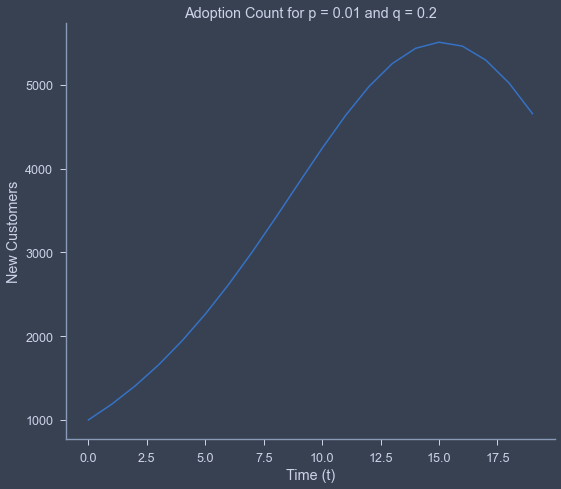

In [5]:

fig = plt.figure()
ax = plt.gca()

# Passing in the arguments from command line
p = 0.01
q = 0.2
M = 100000
period = 20

# Getting the bass model
N, A = get_bass_model(p, q, M = M, period=period)
print(N)
print(A)
# Creating the time periods
t = list(range(0, period))

# Plotting the data. Changing size of points.
ax.plot(t, N, markersize = 4)

# Give a more cleaner look
# Removing the top and right spines.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Setting label and title
ax.set_title('Adoption Count for p = {} and q = {}'.format(p, q))
ax.set_ylabel("New Customers")
ax.set_xlabel("Time (t)")

# Creating a clean layout
fig.tight_layout()
plt.show()

# saving image. Increase dpi for higher quality image
fig.savefig('bass-model', dpi = 500)

M = ultimate market potential volume = targeted customers * penetration rate (expected buyers of trageted cutomers)
